In [1]:
import sys
sys.path.append("./../AutoStock")

In [2]:
from request.dao import Dao
from PyQt5.QtWidgets import QApplication
from pandas import DataFrame
from entity.stock import Stock
from request.enum.stockEnum import CandleUnit
import matplotlib.pyplot as plt

In [3]:
app = QApplication([])

In [4]:
Dao().login()

ErrCode.NORMAL


In [5]:
e_mart = Dao().request_stock_instance("139480")
print(e_mart.get_code_name())


ErrCode.NORMAL
139480


In [6]:
a= Dao().get_today_date()
a


'20210116'

In [7]:
data = Dao().request_candle_data(e_mart,CandleUnit.MINUTE, 30)

ErrCode.NORMAL


In [8]:

# plt.plot(data.time, data.ma5, label='ma5')
# plt.xlabel('time')
# plt.ylabel('close')
# plt.legend(loc="best")
# plt.grid()
# plt.show()

In [9]:
import mpl_finance
import matplotlib.ticker as ticker
%matplotlib inline

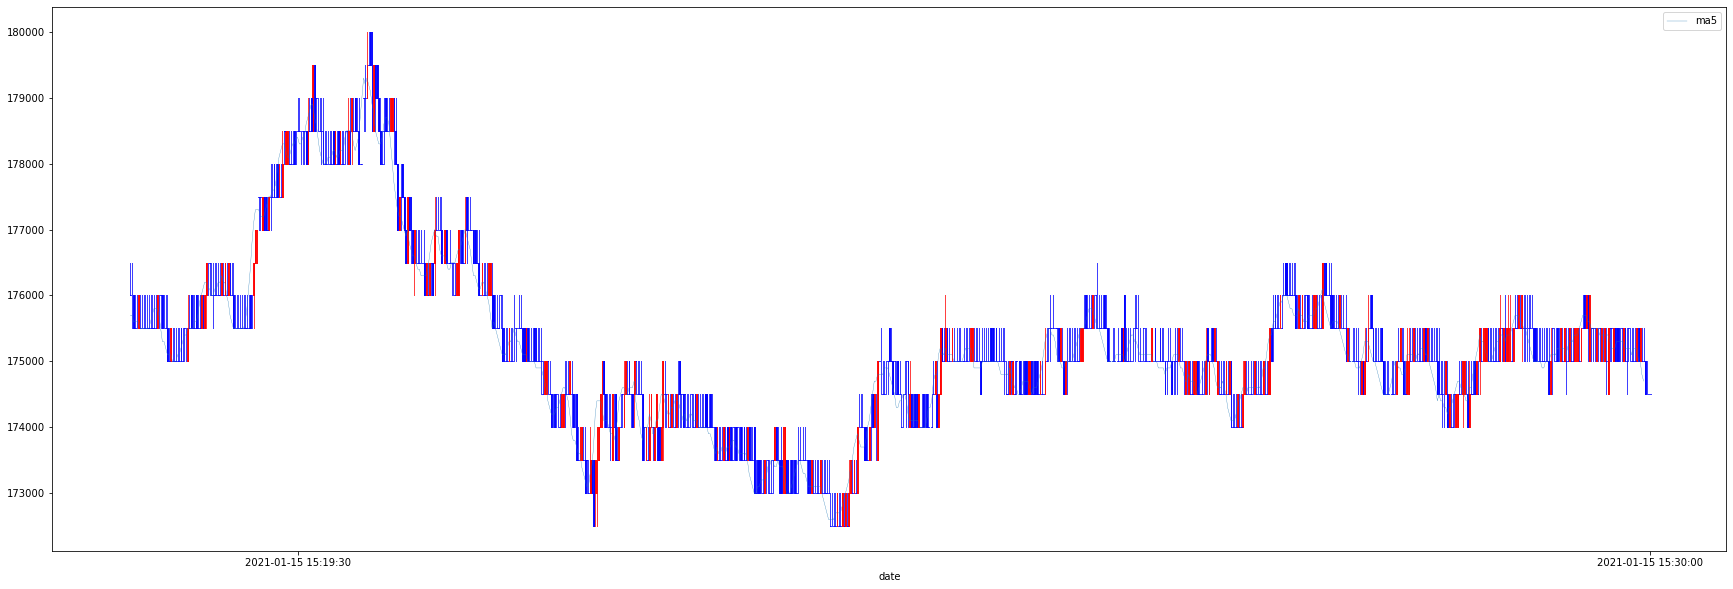

In [10]:
fig = plt.figure(figsize=(30,10))
ax=fig.add_subplot(111)
ax.plot(data.index, data.ma5, label="ma5", linewidth='0.3')
ax.xaxis.set_major_locator(ticker.MaxNLocator(1))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(data.time))
ax.invert_xaxis()
ax.set_xlabel("date")

mpl_finance.candlestick2_ohlc(ax, data.open, data.high, data.low, data.close, width=0.5, colorup='r', colordown='b')
plt.legend(loc="best")
plt.show()

In [11]:
import FinanceDataReader as fd

In [14]:
fd.EtfListing("KR")

,Symbol,Name
0,069500,KODEX 200
1,102110,TIGER 200
2,252670,KODEX 200선물인버스2X
3,153130,KODEX 단기채권
4,122630,KODEX 레버리지
...,...,...
464,285010,KBSTAR 200중공업
465,287310,KBSTAR 200경기소비재
466,334700,KBSTAR 팔라듐선물인버스(H)
467,267500,KBSTAR 미국장기국채선물인버스2X(합성 H)


In [16]:
Dao().request_candle_data("069500", CandleUnit.DAY)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,9752,9752,9752,9753,1,0.002364
2018-01-03,9804,9974,9804,9977,10010,0.022967
2018-01-04,10036,10036,10036,10038,1,0.006114
2018-01-05,10061,10065,10051,10066,5,0.002789
2018-01-08,10036,10136,10036,10137,2,0.007053
...,...,...,...,...,...,...
2018-03-26,8950,8973,8898,8961,326,0.016102
2018-03-27,9016,9215,9016,9213,721,0.028122
2018-03-28,9030,9078,8973,9027,40,-0.020189
